In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

import glob

In [2]:
file_path = "BACI_HS22_Y2022_V202401b.csv"

In [4]:
# Our product codes for blood
product_codes = [970610]

In [5]:
# Chunk size for reading in parts
chunk_size = 10000

# Read the CSV in chunks, ensuring the Multi-Index structure is preserved
filtered_data = pd.concat(
    chunk[chunk.index.get_level_values('k').isin(product_codes)] for chunk in pd.read_csv(
        file_path, chunksize=chunk_size, index_col=[0, 1, 2, 3, 4, 5]  # Adjust this list to match your Multi-Index levels
    )
)

# Check the filtered data
print(filtered_data.head())

Empty DataFrame
Columns: []
Index: [(2022, 4, 276, 970610, 1.759,         0.003), (2022, 4, 372, 970610, 36.632,         0.015), (2022, 4, 826, 970610, 33.359,         0.034), (2022, 4, 842, 970610, 3.823,         0.002), (2022, 8, 757, 970610, 2.589,         0.013)]


In [6]:
chunk = pd.read_csv(file_path, nrows=5, index_col=[0, 1, 2, 3, 4, 5])
print(chunk.index.names)  # This will show the index level names (e.g., ['t', 'i', 'j', 'k'])

['t', 'i', 'j', 'k', 'v', 'q']


In [7]:
filtered_data

Empty DataFrame
Columns: []
Index: [(2022, 4, 276, 970610, 1.759,         0.003), (2022, 4, 372, 970610, 36.632,         0.015), (2022, 4, 826, 970610, 33.359,         0.034), (2022, 4, 842, 970610, 3.823,         0.002), (2022, 8, 757, 970610, 2.589,         0.013), (2022, 12, 757, 970610, 14.555,         0.004), (2022, 24, 842, 970610, 367.979,         0.029), (2022, 31, 826, 970610, 24.165,         0.012), (2022, 31, 842, 970610, 214.325,         0.065), (2022, 32, 251, 970610, 3.313,         0.002), (2022, 32, 348, 970610, 0.192,            NA), (2022, 32, 842, 970610, 159.839,        40.315), (2022, 36, 246, 970610, 8.567,         0.002), (2022, 36, 276, 970610, 2.984,         0.002), (2022, 36, 372, 970610, 11.188,         0.004), (2022, 36, 380, 970610, 6.303,         0.014), (2022, 36, 528, 970610, 1.391,         0.022), (2022, 36, 554, 970610, 22.597,            NA), (2022, 36, 757, 970610, 1.732,         0.003), (2022, 36, 826, 970610, 519.759,         0.988), (2022, 36, 842, 970610, 46.462,         0.049), (2022, 40, 32, 970610, 8.951,         0.250), (2022, 40, 36, 970610, 62.233,         0.088), (2022, 40, 56, 970610, 2.92,         0.011), (2022, 40, 100, 970610, 0.398,         0.001), (2022, 40, 124, 970610, 72.395,         0.021), (2022, 40, 156, 970610, 233.325,         0.094), (2022, 40, 191, 970610, 1.885,         0.006), (2022, 40, 196, 970610, 1.237,         0.004), (2022, 40, 203, 970610, 7.702,         0.018), (2022, 40, 208, 970610, 1.531,         0.001), (2022, 40, 233, 970610, 0.31,         0.002), (2022, 40, 246, 970610, 0.2,         0.001), (2022, 40, 251, 970610, 125.54,         0.169), (2022, 40, 276, 970610, 83.202,         0.078), (2022, 40, 300, 970610, 1.869,         0.005), (2022, 40, 344, 970610, 1143.926,         1.112), (2022, 40, 348, 970610, 13.871,         0.026), (2022, 40, 372, 970610, 4.08,         0.011), (2022, 40, 376, 970610, 56.432,         0.002), (2022, 40, 380, 970610, 36.132,         0.045), (2022, 40, 392, 970610, 254.361,         0.031), (2022, 40, 410, 970610, 1.028,         0.004), (2022, 40, 440, 970610, 0.164,         0.001), (2022, 40, 442, 970610, 0.269,         0.001), (2022, 40, 490, 970610, 231.12,         0.066), (2022, 40, 528, 970610, 13.628,         0.022), (2022, 40, 579, 970610, 0.776,         0.009), (2022, 40, 616, 970610, 5.542,         0.020), (2022, 40, 620, 970610, 3.874,         0.011), (2022, 40, 642, 970610, 2.847,         0.011), (2022, 40, 643, 970610, 8.62,         0.006), (2022, 40, 699, 970610, 34.536,         0.095), (2022, 40, 703, 970610, 1.873,         0.008), (2022, 40, 705, 970610, 3.686,         0.004), (2022, 40, 724, 970610, 6.31,         0.018), (2022, 40, 752, 970610, 0.805,         0.003), (2022, 40, 757, 970610, 444.043,         0.719), (2022, 40, 792, 970610, 4.16,         0.001), (2022, 40, 826, 970610, 828.397,         0.351), (2022, 40, 842, 970610, 1571.229,         4.307), (2022, 48, 826, 970610, 3.817,         0.001), (2022, 51, 757, 970610, 31.668,         0.009), (2022, 51, 826, 970610, 362.431,         0.001), (2022, 56, 36, 970610, 146.088,         0.086), (2022, 56, 40, 970610, 3.159,         0.002), (2022, 56, 124, 970610, 39.857,         0.158), (2022, 56, 136, 970610, 1.895,         0.004), (2022, 56, 152, 970610, 0.181,         0.002), (2022, 56, 156, 970610, 1.363,         0.002), (2022, 56, 251, 970610, 506.858,         0.711), (2022, 56, 276, 970610, 129.552,         0.112), (2022, 56, 344, 970610, 105.425,         0.060), (2022, 56, 376, 970610, 48.595,         0.428), (2022, 56, 380, 970610, 80.096,         0.001), (2022, 56, 392, 970610, 49.251,         0.006), (2022, 56, 410, 970610, 11.427,         0.012), (2022, 56, 442, 970610, 0.16,         0.012), (2022, 56, 484, 970610, 2.582,         0.003), (2022, 56, 490, 970610, 3.218,         0.004), (2022, 56, 528, 970610, 3.834,         0.008), (2022, 56, 554, 970610, 1.264,         0.001), (2022, 56, 579, 970610, 1.085,         0.001), (2022, 56, 634, 970610, 24.

In [8]:
# Assuming 'filtered_data' is your DataFrame with 9941 rows

# Create a dictionary to hold DataFrames for each unique `i`
datasets_by_exporter = {exporter: data for exporter, data in filtered_data.groupby(level='i')}

# Optionally, you can save each DataFrame to a CSV file if needed
for exporter, df in datasets_by_exporter.items():
    output_file = f"dataset_for_exporter_{exporter}.csv"  # Modify the filename as needed
    df.to_csv(output_file)  # Save to CSV
    print(f"Saved dataset for exporter {exporter} to {output_file}")

Saved dataset for exporter 4 to dataset_for_exporter_4.csv
Saved dataset for exporter 8 to dataset_for_exporter_8.csv
Saved dataset for exporter 12 to dataset_for_exporter_12.csv
Saved dataset for exporter 24 to dataset_for_exporter_24.csv
Saved dataset for exporter 31 to dataset_for_exporter_31.csv
Saved dataset for exporter 32 to dataset_for_exporter_32.csv
Saved dataset for exporter 36 to dataset_for_exporter_36.csv
Saved dataset for exporter 40 to dataset_for_exporter_40.csv
Saved dataset for exporter 48 to dataset_for_exporter_48.csv
Saved dataset for exporter 51 to dataset_for_exporter_51.csv
Saved dataset for exporter 56 to dataset_for_exporter_56.csv
Saved dataset for exporter 68 to dataset_for_exporter_68.csv
Saved dataset for exporter 76 to dataset_for_exporter_76.csv
Saved dataset for exporter 100 to dataset_for_exporter_100.csv
Saved dataset for exporter 104 to dataset_for_exporter_104.csv
Saved dataset for exporter 116 to dataset_for_exporter_116.csv
Saved dataset for expo

In [9]:
unique_exporters = filtered_data.index.get_level_values('i').unique()
print(f"Unique exporters: {unique_exporters}")

Unique exporters: Index([  4,   8,  12,  24,  31,  32,  36,  40,  48,  51,
       ...
       795, 804, 818, 826, 842, 858, 860, 862, 887, 894],
      dtype='int64', name='i', length=110)


In [10]:
# Path to the folder containing the CSV files for each exporter
path_to_csvs = "250_year_old_exports_imports/*.csv"  # Adjust this path as needed

# Create a dictionary to store combined quantities for each importer
combined_quantities = {}

# Load each CSV file and aggregate the quantities
for file in glob.glob(path_to_csvs):
    # Read the CSV file
    df = pd.read_csv(file, index_col=[0, 1, 2])  # Assuming Multi-Index (t, i, j)

    # Ensure 'q' is numeric and coerce errors to NaN
    df['q'] = pd.to_numeric(df['q'], errors='coerce')

    # Group by importer (j) and sum the quantities (q)
    quantities_by_importer = df.groupby(level='j')['q'].sum()  # NA values will be ignored by default

    # Combine results
    for importer, quantity in quantities_by_importer.items():
        if pd.isna(quantity):  # Check for NaN
            quantity = 0  # Treat NaN as 0 for aggregation

        if importer in combined_quantities:
            combined_quantities[importer] += quantity
        else:
            combined_quantities[importer] = quantity

# Convert combined_quantities dictionary to DataFrame for better visualization
combined_quantities_df = pd.DataFrame.from_dict(combined_quantities, orient='index', columns=['Total Quantity'])
combined_quantities_df.reset_index(inplace=True)
combined_quantities_df.rename(columns={'index': 'Importer'}, inplace=True)

# Sort the DataFrame by the 'Importer' (country code) column
combined_quantities_df.sort_values(by='Importer', inplace=True)

# Display the combined quantities for each importer
print(combined_quantities_df)

# Save the combined quantities to a CSV file if needed
combined_quantities_df.to_csv("combined_quantities_by_importer.csv", index=False)

    Importer  Total Quantity
74         8           0.006
41        20           0.080
75        31           0.001
65        32           0.541
19        36          22.733
..       ...             ...
64       804           0.079
18       826         146.720
1        842         879.566
86       860           0.096
87       887           0.005

[95 rows x 2 columns]


In [11]:
# Path to the folder containing the CSV files for each exporter
path_to_csvs = "blood_import_exports/*.csv"  # Adjust this path as needed

# Initialize a directed graph
G = nx.DiGraph()

# Load each CSV file and create edges for the directed graph
for file in glob.glob(path_to_csvs):
    # Read the CSV file
    df = pd.read_csv(file, index_col=[0, 1, 2])  # Assuming Multi-Index (t, i, j)
    
    # Ensure 'q' is numeric and coerce errors to NaN
    df['q'] = pd.to_numeric(df['q'], errors='coerce')

    # Iterate over each row and add edges to the graph
    for (t, exporter, importer), group in df.groupby(level=[0, 1, 2]):
        total_quantity = group['q'].sum(skipna=True)  # Sum quantities for the current exporter-importer pair
        if pd.notna(total_quantity):  # Ensure total_quantity is not NaN
            G.add_edge(exporter, importer, weight=total_quantity)

# Optional: You can visualize or analyze the graph now
print("Nodes in the graph:", G.number_of_nodes())
print("Edges in the graph:", G.number_of_edges())

# Optional: To save the graph to a file (e.g., GML format)
#nx.write_gml(G, "export_import_graph.gml")

Nodes in the graph: 222
Edges in the graph: 5200


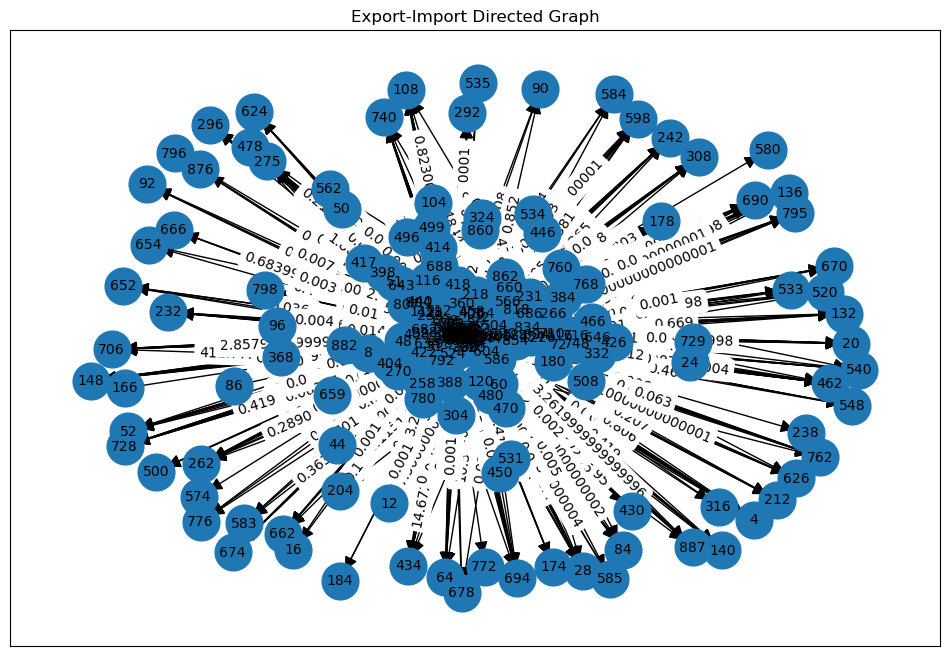

In [12]:
# Draw the graph (this may not work well for very large graphs)
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)  # positions for all nodes
nx.draw_networkx_nodes(G, pos, node_size=700)
nx.draw_networkx_edges(G, pos, arrowstyle='-|>', arrowsize=20)
nx.draw_networkx_labels(G, pos, font_size=10)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title("Export-Import Directed Graph")
plt.show()